https://towardsdatascience.com/beta-distributions-a-cornerstone-of-bayesian-calibration-801f96e21498/

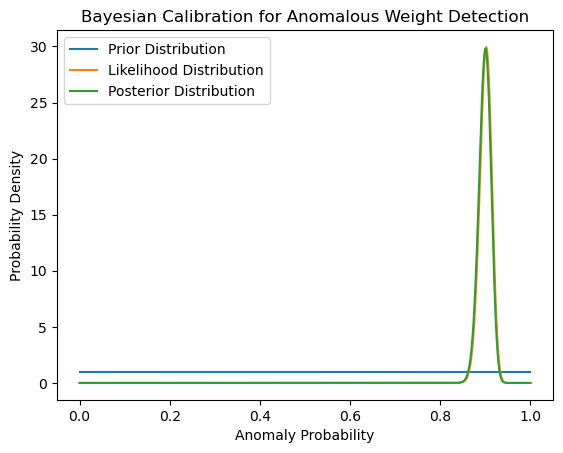

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Simulated data: 500 observations with 90% normal weight and 10% anomalous weights
np.random.seed(42)
normal_instances =  [random.uniform(4.85, 5.15) for i in range(450)]
anomalous_instances_1 =  [random.uniform(3, 4.85) for i in range(25)]
anomalous_instances_2 =  [random.uniform(5.15, 6) for i in range(25)]

data = np.concatenate((normal_instances, anomalous_instances_1, anomalous_instances_2))

# Initial prior belief using a Beta distribution (uninformative uniform prior)
prior_alpha = 1
prior_beta = 1

# Beta Distribution as inferred by Observed data 
likelihood_alpha = len(data[(data >= 4.85) & (data <= 5.15)]) + 1
likelihood_beta = len(data) - likelihood_alpha + 1

# Calculate posterior parameters based on observed data and prior
posterior_alpha = prior_alpha + likelihood_alpha
posterior_beta = prior_beta + likelihood_beta

# Plot the prior, likelihood and posterior Beta distributions
x = np.linspace(0, 1, 1000)
prior_distribution = beta.pdf(x, prior_alpha, prior_beta)
likelihood_distribution = beta.pdf(x, likelihood_alpha, likelihood_beta)
posterior_distribution = beta.pdf(x, posterior_alpha, posterior_beta)

plt.plot(x, prior_distribution, label='Prior Distribution')
plt.plot(x, likelihood_distribution, label='Likelihood Distribution')
plt.plot(x, posterior_distribution, label='Posterior Distribution')

plt.title('Bayesian Calibration for Anomalous Weight Detection')
plt.xlabel('Anomaly Probability')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

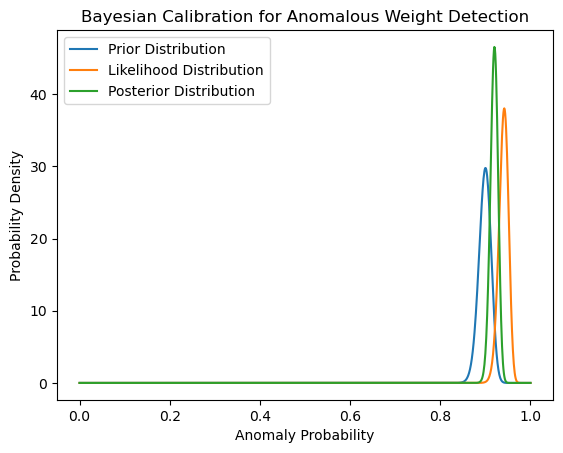

In [6]:
np.random.seed(42)
normal_instances =  [random.uniform(4.85, 5.15) for i in range(470)]
anomalous_instances_1 =  [random.uniform(3, 4.85) for i in range(15)]
anomalous_instances_2 =  [random.uniform(5.15, 6) for i in range(15)]

data = np.concatenate((normal_instances, anomalous_instances_1, anomalous_instances_2))

# Initial prior belief about normal behavior using a Beta distribution
prior_alpha = posterior_alpha
prior_beta = posterior_beta

# Beta Distribution as inferred by Observed data 
likelihood_alpha = len(data[(data >= 4.85) & (data <= 5.15)]) + 1
likelihood_beta = len(data) - likelihood_alpha + 1

# Calculate posterior parameters based on observed data and prior
posterior_alpha = prior_alpha + likelihood_alpha
posterior_beta = prior_beta + likelihood_beta

# Plot the prior, likelihood and posterior Beta distributions
x = np.linspace(0, 1, 1000)
prior_distribution = beta.pdf(x, prior_alpha, prior_beta)
likelihood_distribution = beta.pdf(x, likelihood_alpha, likelihood_beta)
posterior_distribution = beta.pdf(x, posterior_alpha, posterior_beta)

plt.plot(x, prior_distribution, label='Prior Distribution')
plt.plot(x, likelihood_distribution, label='Likelihood Distribution')
plt.plot(x, posterior_distribution, label='Posterior Distribution')

plt.title('Bayesian Calibration for Anomalous Weight Detection')
plt.xlabel('Anomaly Probability')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

## Scenario: Booking Rate from Applications

You’re testing a new online loan application flow that aims to improve the rate of applicants who actually book a loan.

Each applicant either books a loan (1) or doesn’t (0) → this is a Bernoulli outcome.

You want to estimate the true booking rate p.

Before launching the test, you have prior knowledge from past data.

## Define Prior Belief

From past experience:

Historically, about 20% of applicants book.

You’re fairly confident in that estimate based on previous cohorts (say, equivalent to 100 applications).

You represent this prior as: p∼Beta(20,80)

That means:

Prior mean = 20/(20+80)=0.20

You start with moderate certainty around 20%.

## Observe new data


You launch the new flow and observe:

n=200 new applications

k=60 applicants booked (30%)

So, observed booking rate = 0.30.

## Update to Posterior

Using the Beta–Binomial conjugacy:

p∣data∼Beta(α0+k,β0+n−k)

⇒p∣data∼Beta(20+60,80+140)=Beta(80,220)


| Quantity              | Formula            | Value     |
| --------------------- | ------------------ | --------- |
| Prior mean            | (20/100) | 0.20      |
| Observed proportion   | (60/200) | 0.30      |
| Posterior mean        | (80/300) | **0.267** |
| 95% Credible Interval | ≈ (0.22, 0.32)     |           |


## Business interpretation

Your prior belief (20%) shifted upward to about 27%, pulled by the data but not fully matching the 30% observed — because your prior still adds some weight.

Bayesian updating naturally blends past data (experience) and new test results.

The 95% credible interval says there’s a 95% probability that the true booking rate lies between 22% and 32%.

This posterior distribution can now be used to:

Compare against other branches or cohorts

Simulate likely outcomes for scaling the new flow

Inform marketing ROI models


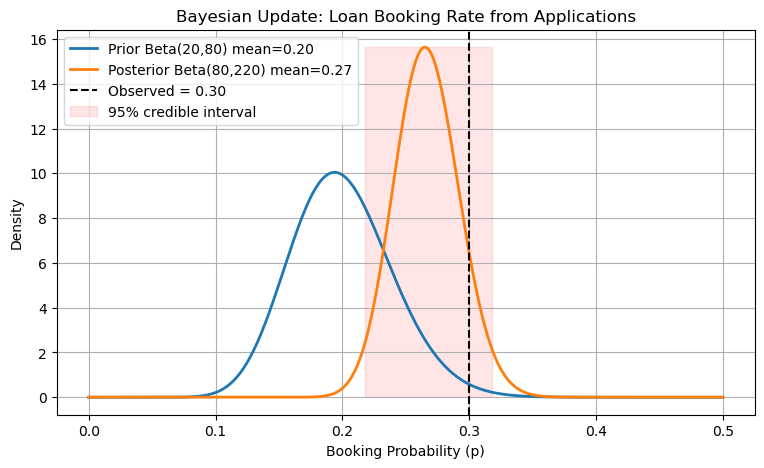

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Prior belief: 20% booking rate from past data
alpha0, beta0 = 20, 80

# Observed data
n, k = 200, 60  # 60 bookings out of 200

# Posterior update
alpha_post = alpha0 + k
beta_post = beta0 + (n - k)

# Summaries
post_mean = alpha_post / (alpha_post + beta_post)
ci_lower, ci_upper = beta.ppf([0.025, 0.975], alpha_post, beta_post)

# Prepare plot
x = np.linspace(0, 0.5, 500)
prior_pdf = beta.pdf(x, alpha0, beta0)
post_pdf = beta.pdf(x, alpha_post, beta_post)

plt.figure(figsize=(9,5))
plt.plot(x, prior_pdf, label=f'Prior Beta({alpha0},{beta0}) mean={alpha0/(alpha0+beta0):.2f}', linewidth=2)
plt.plot(x, post_pdf, label=f'Posterior Beta({alpha_post},{beta_post}) mean={post_mean:.2f}', linewidth=2)
plt.axvline(k/n, color='k', linestyle='--', label=f'Observed = {k/n:.2f}')
plt.fill_betweenx([0, max(prior_pdf.max(), post_pdf.max())],
                  ci_lower, ci_upper, color='red', alpha=0.1, label='95% credible interval')
plt.title('Bayesian Update: Loan Booking Rate from Applications')
plt.xlabel('Booking Probability (p)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


## Scenario & prior

Prior: Beta(20, 80) → prior mean = 20% booking (interpreted as ~100 prior applications).

Control (A): 40 bookings / 200 → observed 20%.

New (B): 60 bookings / 200 → observed 30%.

## Posterior (conjugate updates)

Control posterior: Beta(60, 240), mean ≈ 0.200, 95% CI ≈ (0.157, 0.247).

New posterior: Beta(80, 220), mean ≈ 0.267, 95% CI ≈ (0.218, 0.318).

## Probability new > control & uplift

Probability P(pnew>pcontrol)≈0.975 (i.e., ~97.5% posterior probability new is better).

Expected uplift (posterior mean of pnew	​−pcontrol) ≈ +6.7 percentage points.

95% credible interval for uplift ≈ (-0.03%, +13.4%) (slightly below zero at the lower tail).

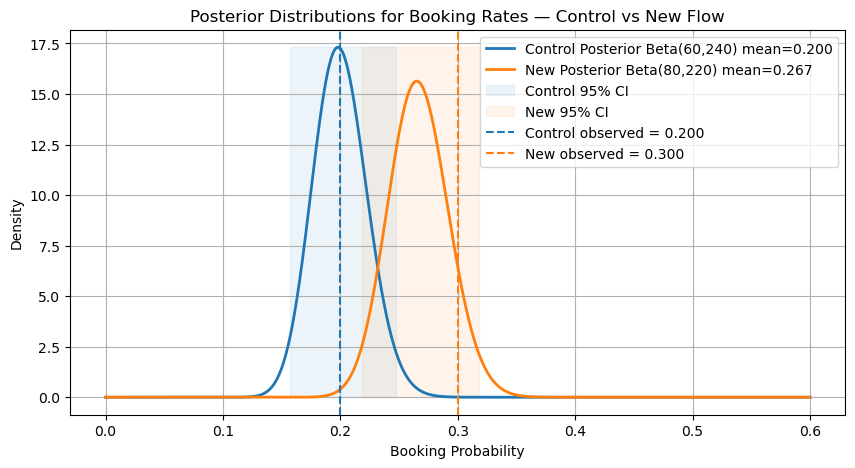

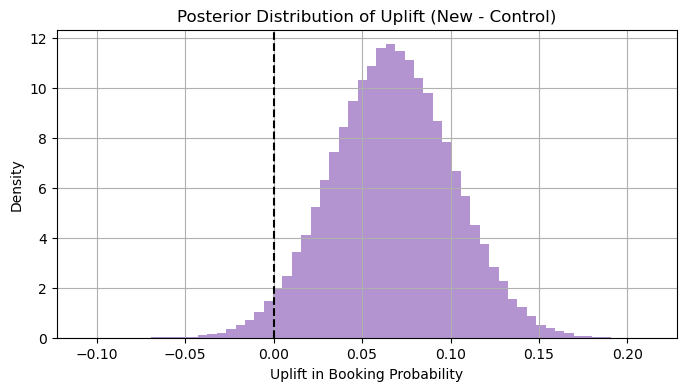

{'prior_mean': 0.2,
 'control_obs': '40/200 = 0.200',
 'new_obs': '60/200 = 0.300',
 'posterior_control': 'Beta(60,240), mean=0.200, 95% CI=(0.157, 0.247)',
 'posterior_new': 'Beta(80,220), mean=0.267, 95% CI=(0.218, 0.318)',
 'P(new > control)': np.float64(0.97454),
 'Expected uplift (new - control)': np.float64(0.0670252630567072),
 'Median uplift': np.float64(0.06695489904999918),
 '95% CI uplift': (np.float64(-0.00032222460917966155),
  np.float64(0.13419257218401667))}

In [10]:
# Bayesian A/B comparison: posterior distributions for booking rates (Beta-Binomial conjugacy)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Prior (shared)
alpha0, beta0 = 20, 80  # prior mean = 0.20

# Data for two flows (control vs new)
n_A, k_A = 200, 40   # Control: 40 bookings out of 200 -> 20%
n_B, k_B = 200, 60   # New: 60 bookings out of 200 -> 30%

# Posterior parameters
alpha_A, beta_A = alpha0 + k_A, beta0 + (n_A - k_A)
alpha_B, beta_B = alpha0 + k_B, beta0 + (n_B - k_B)

# Posterior summaries
mean_A = alpha_A / (alpha_A + beta_A)
mean_B = alpha_B / (alpha_B + beta_B)
ci_A = beta.ppf([0.025, 0.975], alpha_A, beta_A)
ci_B = beta.ppf([0.025, 0.975], alpha_B, beta_B)

# Monte Carlo: draw samples from both posteriors to estimate P(B > A) and uplift distribution
rng = np.random.default_rng(1)
n_samps = 100000
samps_A = rng.beta(alpha_A, beta_A, size=n_samps)
samps_B = rng.beta(alpha_B, beta_B, size=n_samps)
prob_B_superior = np.mean(samps_B > samps_A)
uplift = samps_B - samps_A
prob_uplift_gt_0 = np.mean(uplift > 0)
expected_uplift = np.mean(uplift)
median_uplift = np.median(uplift)
ci_uplift = np.percentile(uplift, [2.5, 97.5])

# Print summaries
summary = {
    'prior_mean': alpha0/(alpha0+beta0),
    'control_obs': f'{k_A}/{n_A} = {k_A/n_A:.3f}',
    'new_obs': f'{k_B}/{n_B} = {k_B/n_B:.3f}',
    'posterior_control': f'Beta({alpha_A},{beta_A}), mean={mean_A:.3f}, 95% CI=({ci_A[0]:.3f}, {ci_A[1]:.3f})',
    'posterior_new': f'Beta({alpha_B},{beta_B}), mean={mean_B:.3f}, 95% CI=({ci_B[0]:.3f}, {ci_B[1]:.3f})',
    'P(new > control)': prob_B_superior,
    'Expected uplift (new - control)': expected_uplift,
    'Median uplift': median_uplift,
    '95% CI uplift': (ci_uplift[0], ci_uplift[1])
}

# Plot posterior densities
x = np.linspace(0, 0.6, 800)
pdf_A = beta.pdf(x, alpha_A, beta_A)
pdf_B = beta.pdf(x, alpha_B, beta_B)

plt.figure(figsize=(10,5))
plt.plot(x, pdf_A, label=f'Control Posterior Beta({alpha_A},{beta_A}) mean={mean_A:.3f}', linewidth=2)
plt.plot(x, pdf_B, label=f'New Posterior Beta({alpha_B},{beta_B}) mean={mean_B:.3f}', linewidth=2)
plt.fill_betweenx([0, max(pdf_A.max(), pdf_B.max())], ci_A[0], ci_A[1], color='C0', alpha=0.08, label='Control 95% CI')
plt.fill_betweenx([0, max(pdf_A.max(), pdf_B.max())], ci_B[0], ci_B[1], color='C1', alpha=0.08, label='New 95% CI')
plt.axvline(k_A/n_A, color='C0', linestyle='--', label=f'Control observed = {k_A/n_A:.3f}')
plt.axvline(k_B/n_B, color='C1', linestyle='--', label=f'New observed = {k_B/n_B:.3f}')
plt.title('Posterior Distributions for Booking Rates — Control vs New Flow')
plt.xlabel('Booking Probability')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Plot uplift distribution
plt.figure(figsize=(8,4))
plt.hist(uplift, bins=60, density=True, alpha=0.7, color='tab:purple')
plt.axvline(0, color='k', linestyle='--')
plt.title('Posterior Distribution of Uplift (New - Control)')
plt.xlabel('Uplift in Booking Probability')
plt.ylabel('Density')
plt.grid(True)
plt.show()

summary


Nice — let’s turn that posterior uplift into business numbers you can drop into a deck.

I’ll use the Bayesian A/B results we already computed:

Posterior expected uplift (new − control) = 0.06703 (≈ 6.703 percentage points)

Posterior 95% credible interval for uplift = (−0.000322, 0.134193)

Posterior probability P(new > control) ≈ 0.9745 (≈ 97.45%)

Below I convert those into extra bookings per 10,000 applicants, relative lift, and revenue under a few revenue-per-booking scenarios. I’ll show formulas so you can plug in your own numbers.

## Formulas

Extra bookings per N applicants = 
uplift
×
𝑁
uplift×N.

Expected extra bookings per 10,000 = 
0.0670253
×
10,000
0.0670253×10,000.

95% CI (bookings) = (lower_uplift × 10,000, upper_uplift × 10,000).

Expected revenue gain = Expected extra bookings × revenue_per_booking.

95% CI revenue = CI(bookings) × revenue_per_booking.

Relative lift vs control rate 
𝑝
control
=
0.20
p
control
	​

=0.20: relative = expected_uplift / 0.20.

## Numbers (per 10,000 applicants)
Bookings

Expected extra bookings ≈ 670 (exact 670.25)

95% credible interval (bookings) ≈ [−3, 1,342]

lower = −3.22 bookings (≈ no change / tiny loss)

upper = 1,341.93 bookings

(Interpretation: most of posterior mass is positive — 97.45% chance uplift > 0 — so negative lower bound is due to tail uncertainty.)

## Relative lift vs control (control conversion = 20%)

Relative increase ≈ 
0.06703
/
0.20
0.06703/0.20 = 33.5% (i.e., expected ~33.5% more bookings relative to baseline 20%).

## Revenue scenarios (per 10,000 applicants)

I’ll compute for three common per-booking revenue assumptions. Round to nearest dollar.

Revenue per booking = $100

Expected revenue gain ≈ 670.25 × $100 = $67,025

95% CI ≈ [−3.22 × $100, 1,341.93 × $100] = [$−322, $134,193]

Revenue per booking = $200

Expected gain ≈ $134,050

95% CI ≈ [$−644, $268,386]

Revenue per booking = $500

Expected gain ≈ $335,126

95% CI ≈ [$−1,611, $670,963]

(You can swap in any revenue_per_booking and use the same multiplication.)

## Quick textual summary you can paste into a slide

Posterior probability the new flow is better: 97.5%.

Expected increase in booking rate ≈ +6.7 percentage points (from 20% → ≈ 26.7%), a ~33.5% relative lift.

For 10,000 applicants, this implies ~670 additional bookings (95% CI ≈ −3 to +1,342).

If each booking is worth $200, expected incremental revenue ≈ $134k (95% CI ≈ −$644 to +$268k).

## Notes & next steps

The 95% CI includes a tiny negative value at the lower bound because of uncertainty; however P(new > control) ≈ 97.5% — high confidence the new flow is better.
